In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image
from keras.datasets import mnist
from IPython.display import Image as IPImage

from neuralnetlib.preprocessing import one_hot_encode
from neuralnetlib.models import Sequential, GAN
from neuralnetlib.layers import Input, Dense

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
n_classes = np.unique(y_train).shape[0]

# Flatten images
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Normalize pixel values
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Labels to categorical
y_train = one_hot_encode(y_train, n_classes)
y_test = one_hot_encode(y_test, n_classes)

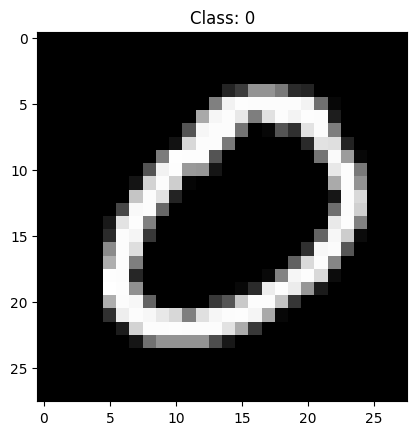

In [3]:
i = random.randint(0,len(x_train) - 1)
plt.imshow(x_train[i].reshape(28,28), cmap='gray')
plt.title('Class: ' + str(np.argmax(y_train[i])))
plt.show()

In [4]:
noise_dim = 32

generator = Sequential()
generator.add(Input(noise_dim))
generator.add(Dense(128, input_dim = noise_dim, activation='relu'))
generator.add(Dense(784, activation = 'sigmoid'))

In [5]:
discriminator = Sequential()
discriminator.add(Input(784))
discriminator.add(Dense(128, input_dim=784, activation='relu'))
discriminator.add(Dense(1, activation='sigmoid'))

In [6]:
gan = GAN(latent_dim=noise_dim)

gan.compile(
    generator,
    discriminator,
    generator_optimizer='adam',
    discriminator_optimizer='adam',
    loss_function='bce',
    verbose=True
)

GAN(latent_dim=32, gradient_clip_threshold=0.1, enable_padding=False, padding_size=32, random_state=1732975000247274900)
-------------------------------------------------
Generator:
Sequential(gradient_clip_threshold=5.0, enable_padding=False, padding_size=32, random_state=1732975000215402000)
-------------------------------------------------
Layer 1: Input(input_shape=(32,))
Layer 2: Dense(units=128)
Layer 3: Activation(ReLU)
Layer 4: Dense(units=784)
Layer 5: Activation(Sigmoid)
-------------------------------------------------
Loss function: BinaryCrossentropy
Optimizer: Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, clip_norm=None, clip_value=None)
-------------------------------------------------
-------------------------------------------------
Discriminator:
Sequential(gradient_clip_threshold=5.0, enable_padding=False, padding_size=32, random_state=1732975000231080500)
-------------------------------------------------
Layer 1: Input(input_shape=(784,))
Layer 

In [ ]:
epochs = 100
batch_size = 128

history = gan.fit(x_train,
                 epochs=40,
                 batch_size=128,
                 plot_generated=True,
                 )   


[==============================] 100% Epoch 1/40 - d_loss: 1.2015 - g_loss: 24.4730 -  - 17.87s
[==============================] 100% Epoch 2/40 - d_loss: 0.2194 - g_loss: 33.5534 -  - 16.91s0s97ss0.33s
[==============================] 100% Epoch 3/40 - d_loss: 0.0132 - g_loss: 32.5305 -  - 17.29s-  - 0.19sss
[==============================] 100% Epoch 4/40 - d_loss: 0.0038 - g_loss: 34.2976 -  - 19.15s48s07ss
[==============================] 100% Epoch 5/40 - d_loss: 0.0072 - g_loss: 34.1430 -  - 20.88s30ss40ss0.13s
[==============================] 100% Epoch 6/40 - d_loss: 0.0078 - g_loss: 33.2763 -  - 18.68s
[==============================] 100% Epoch 7/40 - d_loss: 0.0106 - g_loss: 32.5376 -  - 17.36s- 0.19s
[==============================] 100% Epoch 8/40 - d_loss: 0.0093 - g_loss: 31.9930 -  - 17.13s0.27ss0s6s
[==============================] 100% Epoch 9/40 - d_loss: 0.0121 - g_loss: 31.8290 -  - 17.68s07 -  - 0.16s
[==============================] 100% Epoch 10/40 - d_loss: 0.

In [ ]:
image_files = [f for f in os.listdir() if f.endswith('.png') and f.startswith('video')]
image_files.sort(key=lambda x: int(x.replace('video', '').replace('.png', '')))

images = [Image.open(img) for img in image_files]

if images:
    images[0].save('output.gif', save_all=True, append_images=images[1:], duration=100, loop=0)

print("GIF 'output.gif' succesffuly created!")

GIF 'output.gif' succesffuly created!


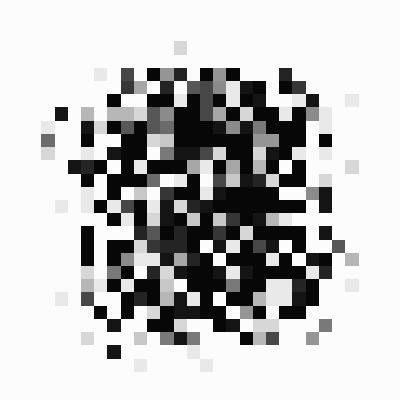

In [ ]:
IPImage(filename="output.gif")